In [ ]:
import os
import pandas as pd
import shutil
from tqdm import tqdm

# --- CONFIGURATION ---

# The path to your CSV file that contains the results of your best model run.
BEST_RESULT_CSV = "/content/drive/MyDrive/Kodingan/result/consensus_test_results.csv" # Please verify this is the correct path

# The source directory where all the original images are stored.
SOURCE_DATA_DIR = "/content/drive/MyDrive/Kodingan/dataset_testing_baru_processed"

# The new destination directory where the benchmark test set will be created.
DESTINATION_DATA_DIR = "/content/drive/MyDrive/Kodingan/best_testing"


def recreate_benchmark_dataset():
    """
    Reads a results CSV to identify a specific subset of images and copies them
    from a source directory to a new destination directory, preserving the
    class subfolder structure.
    """
    print(f"--- Starting Benchmark Dataset Recreation ---")

    # --- Step 1: Read the CSV file ---
    try:
        print(f"Reading result file from: {BEST_RESULT_CSV}")
        df = pd.read_csv(BEST_RESULT_CSV)
        # Ensure the 'image_path' column exists
        if 'image_path' not in df.columns:
            print(f"Error: The CSV file must contain an 'image_path' column.")
            return
        image_paths_from_csv = df['image_path'].tolist()
        print(f"Found {len(image_paths_from_csv)} image records in the CSV.")
    except FileNotFoundError:
        print(f"Error: The result CSV file was not found at '{BEST_RESULT_CSV}'. Please check the path.")
        return
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return

    # --- Step 2: Prepare the destination directory ---
    if not os.path.exists(DESTINATION_DATA_DIR):
        print(f"Creating destination directory: {DESTINATION_DATA_DIR}")
        os.makedirs(DESTINATION_DATA_DIR)
    else:
        print(f"Destination directory already exists. Files will be added or overwritten.")

    # --- Step 3: Find and copy the files ---
    files_copied = 0
    files_not_found = 0

    print(f"\nSearching for images in: {SOURCE_DATA_DIR}")
    print("Copying files to the new benchmark directory...")

    # Use tqdm for a progress bar
    for original_path in tqdm(image_paths_from_csv, desc="Processing Images"):
        # Extract the filename and the class name (subfolder) from the path in the CSV
        filename = os.path.basename(original_path)
        class_name = os.path.basename(os.path.dirname(original_path))

        # Construct the full path to the source file in the *actual* source directory
        source_file_path = os.path.join(SOURCE_DATA_DIR, class_name, filename)

        # Check if the source file actually exists
        if os.path.exists(source_file_path):
            # Create the destination subfolder (e.g., .../best_testing/Amri) if it doesn't exist
            destination_class_dir = os.path.join(DESTINATION_DATA_DIR, class_name)
            os.makedirs(destination_class_dir, exist_ok=True)

            # Construct the full path for the destination file
            destination_file_path = os.path.join(destination_class_dir, filename)

            # Copy the file
            shutil.copy2(source_file_path, destination_file_path)
            files_copied += 1
        else:
            # If the file isn't found, print a warning
            # print(f"Warning: File not found in source directory: {source_file_path}")
            files_not_found += 1

    # --- Final Report ---
    print("\n--- Process Complete ---")
    print(f"Successfully copied {files_copied} files.")
    if files_not_found > 0:
        print(f"Warning: {files_not_found} files listed in the CSV were not found in the source directory.")
    print(f"Your benchmark dataset is now ready at: {DESTINATION_DATA_DIR}")


if __name__ == '__main__':
    recreate_benchmark_dataset()

--- Starting Benchmark Dataset Recreation ---
Reading result file from: /content/drive/MyDrive/Kodingan/result/consensus_test_results.csv
Found 760 image records in the CSV.
Creating destination directory: /content/drive/MyDrive/Kodingan/best_testing

Searching for images in: /content/drive/MyDrive/Kodingan/dataset_testing_baru_processed
Copying files to the new benchmark directory...


Processing Images: 100%|██████████| 760/760 [03:12<00:00,  3.94it/s]


--- Process Complete ---
Successfully copied 760 files.
Your benchmark dataset is now ready at: /content/drive/MyDrive/Kodingan/best_testing


In [ ]:
from google.colab import runtime
runtime.unassign()

--- Starting Head Pose Orientation Analysis ---
Reading data from: /content/drive/MyDrive/Kodingan/result/consensus_test_results.csv

Calculating distribution...

--- Orientation Distribution Report ---
Total images analyzed: 670

Image Count by Orientation:
| orientation    |   count |
|:---------------|--------:|
| Front, Neutral |     363 |
| Right, Neutral |      80 |
| Left, Neutral  |      72 |
| Front, Down    |      43 |
| Right, Down    |      31 |
| Left, Down     |      26 |
| Front, Up      |      23 |
| Right, Up      |      17 |
| Left, Up       |      15 |

Percentage Distribution by Orientation:
| orientation    | proportion   |
|:---------------|:-------------|
| Front, Neutral | 54.18%       |
| Right, Neutral | 11.94%       |
| Left, Neutral  | 10.75%       |
| Front, Down    | 6.42%        |
| Right, Down    | 4.63%        |
| Left, Down     | 3.88%        |
| Front, Up      | 3.43%        |
| Right, Up      | 2.54%        |
| Left, Up       | 2.24%        |

Genera

/tmp/ipython-input-1171304849.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orientation_counts.index, y=orientation_counts.values, ax=ax, palette="viridis")



Distribution plot saved to: /content/drive/MyDrive/Kodingan/result/orientation_distribution_report.png


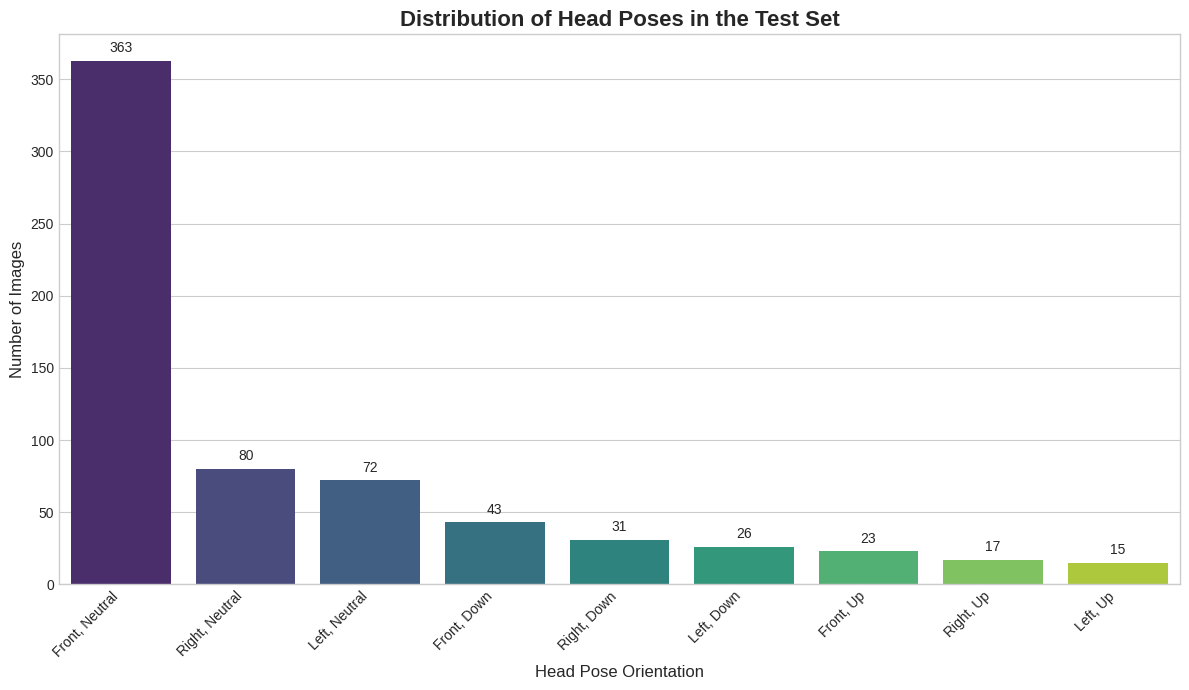

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---

# The path to your CSV file that contains the final test results.
# This should have the 'orientation' column.
CSV_FILE_PATH = "/content/drive/MyDrive/Kodingan/result/consensus_test_results.csv"

# The directory where the output plot will be saved.
SAVE_DIR = "/content/drive/MyDrive/Kodingan/result"


def analyze_orientation_distribution():
    """
    Reads a results CSV file and calculates the distribution of head pose
    orientations, printing a report and generating a visualization.
    """
    print("--- Starting Head Pose Orientation Analysis ---")

    # --- Step 1: Read the CSV file ---
    try:
        print(f"Reading data from: {CSV_FILE_PATH}")
        df = pd.read_csv(CSV_FILE_PATH)
        # Ensure the 'orientation' column exists
        if 'orientation' not in df.columns:
            print(f"Error: The CSV file must contain an 'orientation' column.")
            return
    except FileNotFoundError:
        print(f"Error: The result CSV file was not found at '{CSV_FILE_PATH}'. Please check the path.")
        return
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return

    # --- Step 2: Calculate the distribution ---
    print("\nCalculating distribution...")

    # Get the raw counts of each unique value in the 'orientation' column
    orientation_counts = df['orientation'].value_counts()

    # Get the percentage distribution
    orientation_percentages = df['orientation'].value_counts(normalize=True)

    # --- Step 3: Print the report ---
    print("\n--- Orientation Distribution Report ---")
    print(f"Total images analyzed: {len(df)}\n")

    print("Image Count by Orientation:")
    print(orientation_counts.to_markdown()) # Using markdown for a nice table format

    print("\nPercentage Distribution by Orientation:")
    # Format the percentages for better readability
    print(orientation_percentages.map('{:.2%}'.format).to_markdown())

    # --- Step 4: Generate and save the bar chart ---
    print("\nGenerating visualization...")

    # Set a nice style for the plot
    plt.style.use('seaborn-v0_8-whitegrid')

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 7))

    # Create the bar plot using seaborn
    sns.barplot(x=orientation_counts.index, y=orientation_counts.values, ax=ax, palette="viridis")

    # Set titles and labels for clarity
    ax.set_title('Distribution of Head Poses in the Test Set', fontsize=16, fontweight='bold')
    ax.set_xlabel('Head Pose Orientation', fontsize=12)
    ax.set_ylabel('Number of Images', fontsize=12)

    # Rotate the x-axis labels to prevent them from overlapping
    plt.xticks(rotation=45, ha="right")

    # Add the exact count on top of each bar for easy reading
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=10)

    # Ensure the save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # Save the plot to a file
    save_path = os.path.join(SAVE_DIR, "orientation_distribution_report.png")
    fig.tight_layout() # Adjust layout to make sure everything fits
    fig.savefig(save_path)

    print(f"\nDistribution plot saved to: {save_path}")

    # Display the plot in the notebook
    plt.show()


if __name__ == '__main__':
    analyze_orientation_distribution()

--- Starting Head Pose Orientation Analysis ---
Reading data from: /content/drive/MyDrive/Kodingan/head_pose_labels.csv

Calculating distribution...

--- Orientation Distribution Report ---
Total images analyzed: 1118

Image Count by Orientation:
| orientation    |   count |
|:---------------|--------:|
| Front, Neutral |     540 |
| Left, Neutral  |     164 |
| Right, Neutral |     141 |
| Front, Down    |      65 |
| Front, Up      |      57 |
| Right, Down    |      51 |
| Left, Down     |      50 |
| Left, Up       |      28 |
| Right, Up      |      22 |

Percentage Distribution by Orientation:
| orientation    | proportion   |
|:---------------|:-------------|
| Front, Neutral | 48.30%       |
| Left, Neutral  | 14.67%       |
| Right, Neutral | 12.61%       |
| Front, Down    | 5.81%        |
| Front, Up      | 5.10%        |
| Right, Down    | 4.56%        |
| Left, Down     | 4.47%        |
| Left, Up       | 2.50%        |
| Right, Up      | 1.97%        |

Generating visuali

/tmp/ipython-input-1546817422.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orientation_counts.index, y=orientation_counts.values, ax=ax, palette="viridis")



Distribution plot saved to: /content/drive/MyDrive/Kodingan/result/head_pose_labels_report.png


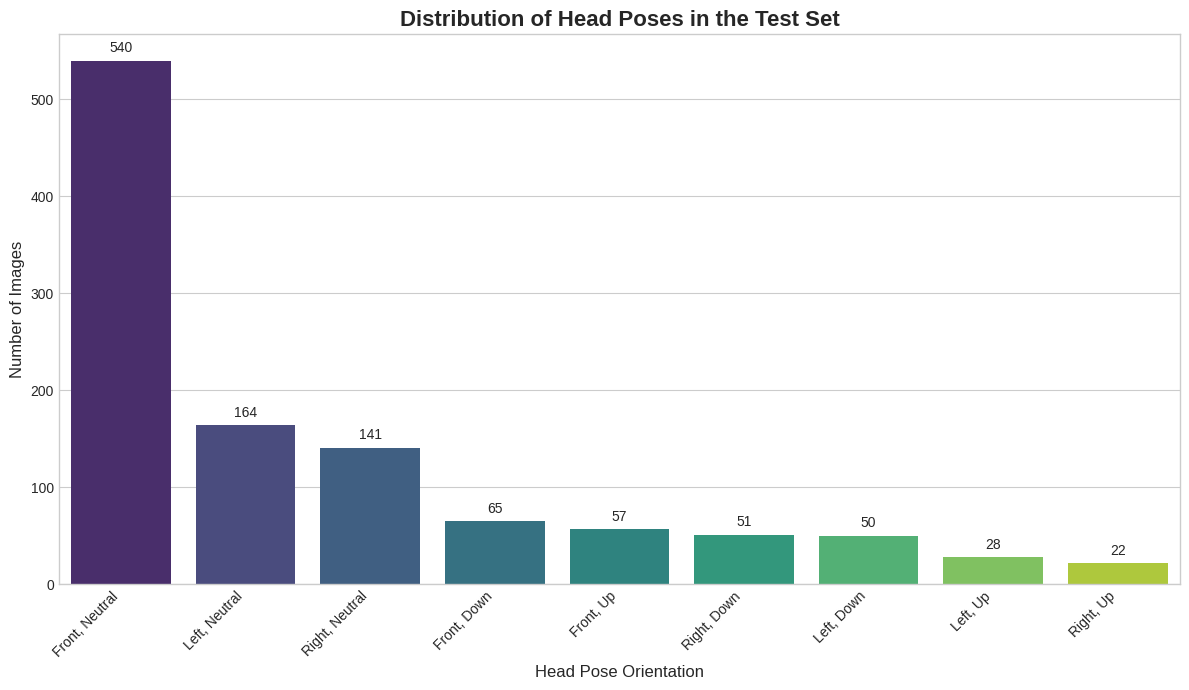

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURATION ---

# The path to your CSV file that contains the final test results.
# This should have the 'orientation' column.
CSV_FILE_PATH = "/content/drive/MyDrive/Kodingan/head_pose_labels.csv"

# The directory where the output plot will be saved.
SAVE_DIR = "/content/drive/MyDrive/Kodingan/result"


def analyze_orientation_distribution():
    """
    Reads a results CSV file and calculates the distribution of head pose
    orientations, printing a report and generating a visualization.
    """
    print("--- Starting Head Pose Orientation Analysis ---")

    # --- Step 1: Read the CSV file ---
    try:
        print(f"Reading data from: {CSV_FILE_PATH}")
        df = pd.read_csv(CSV_FILE_PATH)
        # Ensure the 'orientation' column exists
        if 'orientation' not in df.columns:
            print(f"Error: The CSV file must contain an 'orientation' column.")
            return
    except FileNotFoundError:
        print(f"Error: The result CSV file was not found at '{CSV_FILE_PATH}'. Please check the path.")
        return
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return

    # --- Step 2: Calculate the distribution ---
    print("\nCalculating distribution...")

    # Get the raw counts of each unique value in the 'orientation' column
    orientation_counts = df['orientation'].value_counts()

    # Get the percentage distribution
    orientation_percentages = df['orientation'].value_counts(normalize=True)

    # --- Step 3: Print the report ---
    print("\n--- Orientation Distribution Report ---")
    print(f"Total images analyzed: {len(df)}\n")

    print("Image Count by Orientation:")
    print(orientation_counts.to_markdown()) # Using markdown for a nice table format

    print("\nPercentage Distribution by Orientation:")
    # Format the percentages for better readability
    print(orientation_percentages.map('{:.2%}'.format).to_markdown())

    # --- Step 4: Generate and save the bar chart ---
    print("\nGenerating visualization...")

    # Set a nice style for the plot
    plt.style.use('seaborn-v0_8-whitegrid')

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 7))

    # Create the bar plot using seaborn
    sns.barplot(x=orientation_counts.index, y=orientation_counts.values, ax=ax, palette="viridis")

    # Set titles and labels for clarity
    ax.set_title('Distribution of Head Poses in the Test Set', fontsize=16, fontweight='bold')
    ax.set_xlabel('Head Pose Orientation', fontsize=12)
    ax.set_ylabel('Number of Images', fontsize=12)

    # Rotate the x-axis labels to prevent them from overlapping
    plt.xticks(rotation=45, ha="right")

    # Add the exact count on top of each bar for easy reading
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=10)

    # Ensure the save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # Save the plot to a file
    save_path = os.path.join(SAVE_DIR, "head_pose_labels_report.png")
    fig.tight_layout() # Adjust layout to make sure everything fits
    fig.savefig(save_path)

    print(f"\nDistribution plot saved to: {save_path}")

    # Display the plot in the notebook
    plt.show()


if __name__ == '__main__':
    analyze_orientation_distribution()